# Нейрондық желілер негіздері
### Персептрон, көпқабатты желілер **(MLP)**, активация функциялары, тура және кері таралу **(forward/backward propagation)**

## I. Theory

### Task 1. 

<!-- 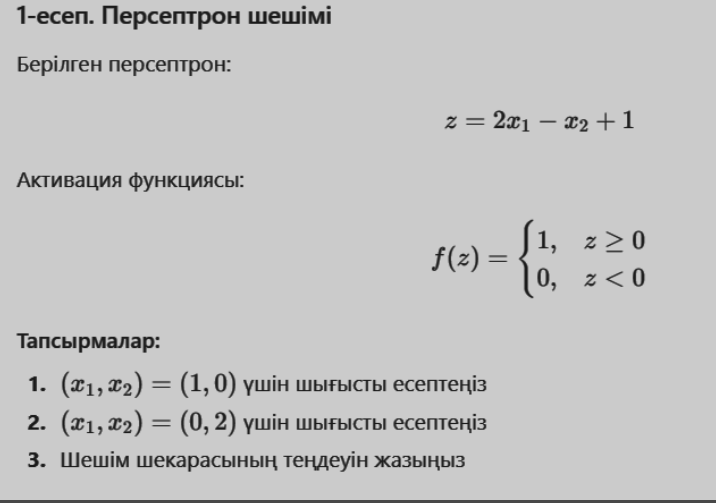? -->
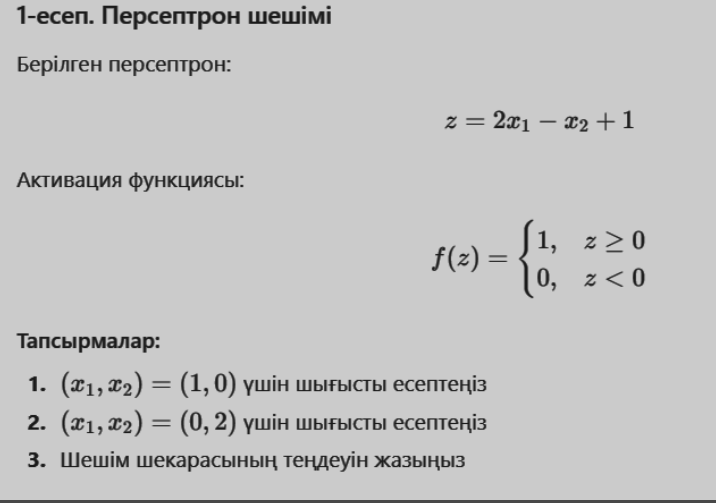

1. $(x_1, x_2) = (1, 0)$

$$z = 2(1) - 0 + 1 = 2 + 1 = 3$$


$z = 3$ болғандықтан ($3 \ge 0$), функцияның мәні 1 болады.
Жауабы: $f(z) = 1$


2. $(x_1, x_2) = (0, 2)$

$$z = 2(0) - 2 + 1 = 0 - 2 + 1 = -1$$

$z = -1$ болғандықтан ($-1 < 0$), функцияның мәні 0 болады.
Жауабы: $f(z) = 0$


Шешім шекарасы (decision boundary) дегеніміз — активтендіру функциясының мәні ауысатын сызық. Бұл $z = 0$ болған кезде орындалады.Сонымен, теңдеуді нөлге теңестіреміз:$$2x_1 - x_2 + 1 = 0$$Ыңғайлы болу үшін оны $x_2$ арқылы өрнектеуге болады:$$x_2 = 2x_1 + 1$$

<img src="IMG_20260212_215007.jpg" width="700">

### Task 2.
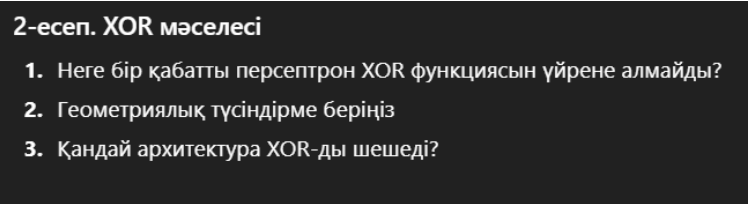

1. Перцептрон екі класты бөлу үшін жазықтықта бір түзу сызықты пайдаланады. XOR функциясында нүктелердің орналасуы сондай, оларды бір түзу сызықпен екі топқа (0 және 1) бөлу математикалық тұрғыдан мүмкін емес.

2. Геометриялық түсіндірме

<img src="1_Tc8UgR_fjI_h0p3y4H9MwA.png " width='900'>

3. Бұл мәселені шешу үшін көп қабатты перцептрон (Multi-Layer Perceptron - MLP) қажет.

### Task 3. 
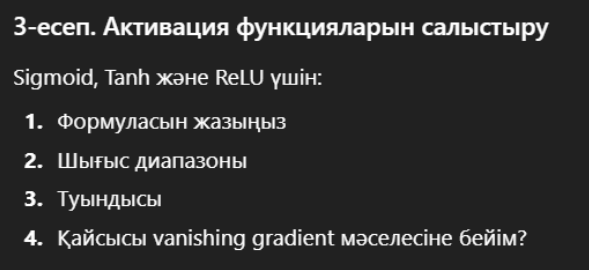

Белсендіру функциясы-бұл сигналдың қандай күшке ауысатынын шешетін "сүзгі".
Характеристика

### Характеристика функций активации

| Название        | Формула                                      | Диапазон        | Производная                                  |
|-----------------|----------------------------------------------|-----------------|-----------------------------------------------|
| **Sigmoid**     | $\sigma(z) = \frac{1}{1 + e^{-z}}$           | от 0 до 1       | $f'(z) = \sigma(z)(1 - \sigma(z))$           |
| **Tanh (Тангенс)** | $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ | от -1 до 1      | $f'(z) = 1 - \tanh^2(z)$                     |
| **ReLU**        | $f(z) = \max(0, z)$                          | от 0 до +∞      | $f'(z) = \begin{cases} 1, & z > 0 \\ 0, & z \le 0 \end{cases}$ |

<img src='https://avatars.mds.yandex.net/i?id=8e38c3cd477f80f189e72194663c27fd_l-4904464-images-thumbs&n=13' width='800'>


### Task 4. 
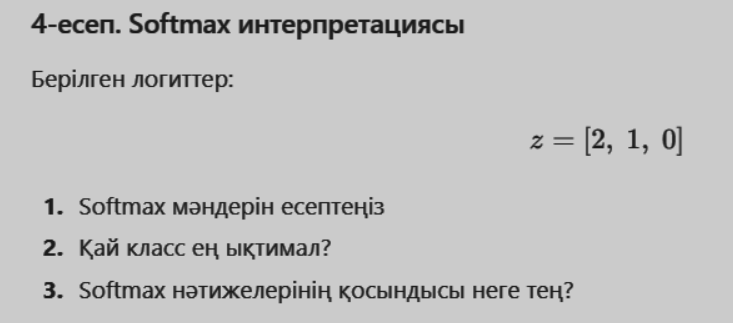
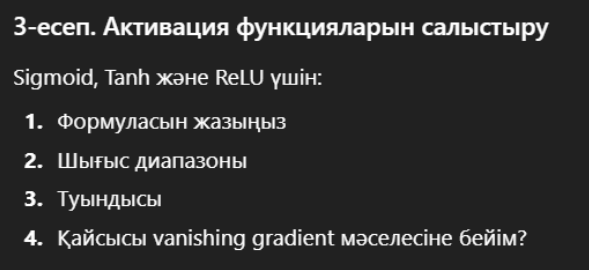

<img src='IMG_20260212_215031[1].jpg' width='600'>

### Task 5. 

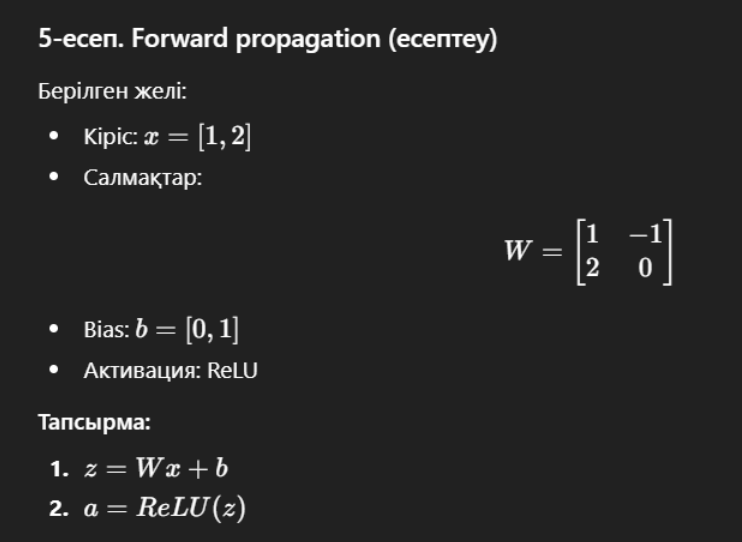

<img src='IMG_20260212_215049.jpg' width='700'>

## II. Calculation exercises (Backpropagation)

### Task 6. 
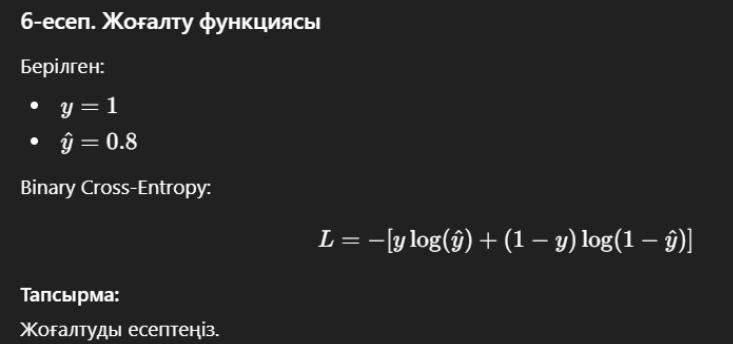

<img src='IMG_20260212_215109.jpg' width='700'>

### Task 7. 
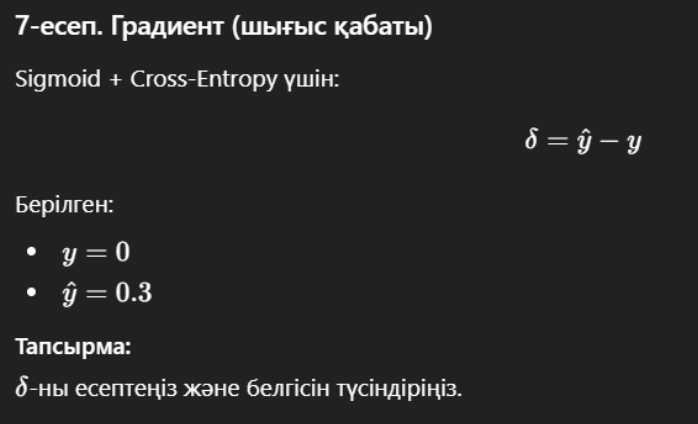

<img src='IMG_20260212_215135.jpg' width='700'>

### Task 8. 
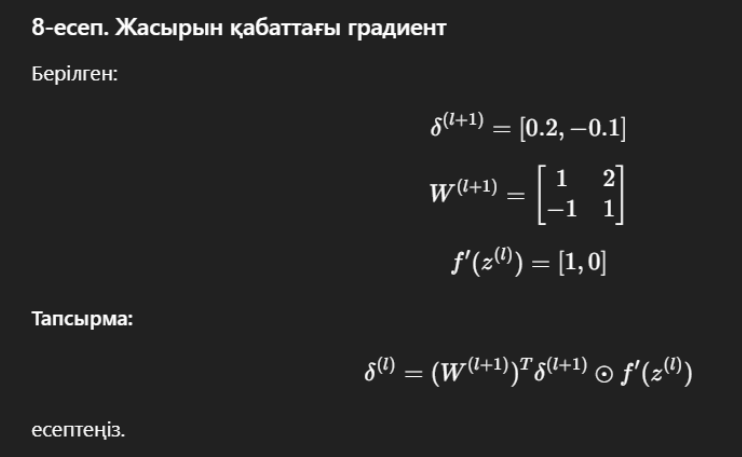

<img src='IMG_20260212_215145.jpg' width='700'>

### Task 9.
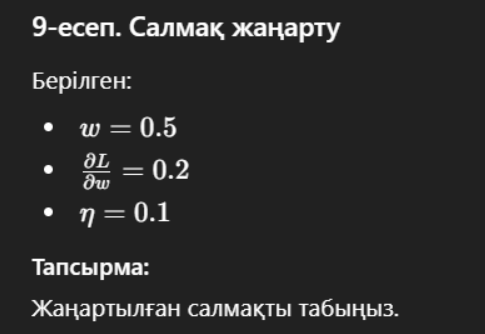

<img src='IMG_20260212_215121.jpg' width='700'>

# III. Practice (Python/Colab coding)

### Task 10. 
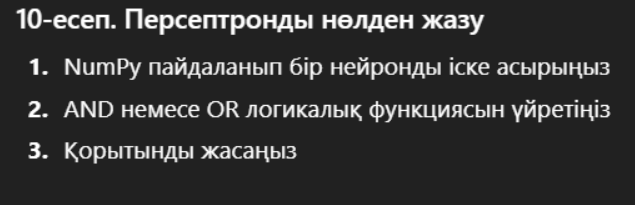

In [ ]:
import numpy as np 

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [0], [0], [1]])

np.random.seed(42)
weights = np.random.rand(2,1)
bias = np.random.rand(1)
learning_rate = 0.1 

for epoch in range(100):

    # z = x*w + b, just linear combination
    # kernel 
    z = np.dot(X, weights) + bias 

    # Sigmoid activation
    # Non-Linear part
    predictions = 1 / (1 + np.exp(-z))

    # gradient
    error = predictions - y

    # Backpropagation
    weights = - (learning_rate * np.dot(X.T, error))
    bias = - (learning_rate * np.sum(error))


print("Testing")
for i in range(len(X)):
    z_final = np.dot(X[i], weights) + bias 
    pred = 1 / (1 + np.exp(-z_final))
    print(f"Entrance: {X[i]}, Prediction: {pred[0]} -> {'1' if pred > 0.5 else '0'}")
    


Testing
Entrance: [0 0], Prediction: 0.4771908586228911 -> 0
Entrance: [0 1], Prediction: 0.4782497842620476 -> 0
Entrance: [1 0], Prediction: 0.4782497842620476 -> 0
Entrance: [1 1], Prediction: 0.479308905419432 -> 0


### Task 11.
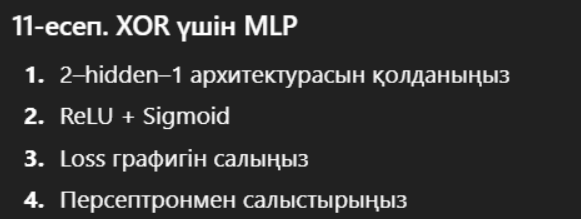

Epoch 0, Error (Loss): 0.6935307172961309
Epoch 500, Error (Loss): 0.061892351396469036
Epoch 1000, Error (Loss): 0.008342163915372352
Epoch 1500, Error (Loss): 0.0031766413952217677
Epoch 2000, Error (Loss): 0.0016424346060100801
Epoch 2500, Error (Loss): 0.0010130350895229128
Epoch 3000, Error (Loss): 0.000699061652391432
Epoch 3500, Error (Loss): 0.0005194771125370846
Epoch 4000, Error (Loss): 0.00040626832868035864
Epoch 4500, Error (Loss): 0.00032967285727428377


Entrance: [0 0] -> Prediction: 0.0005 -> Class: 0
Entrance: [0 1] -> Prediction: 0.9998 -> Class: 1
Entrance: [1 0] -> Prediction: 0.9998 -> Class: 1
Entrance: [1 1] -> Prediction: 0.0002 -> Class: 0


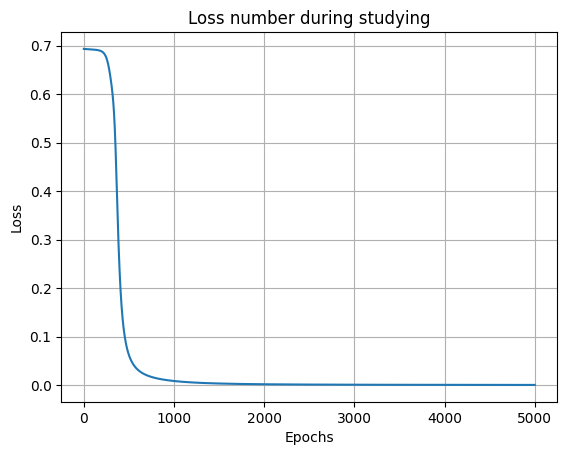

In [ ]:
import matplotlib.pyplot as plt 

class MLP: 
    def __init__(self, input_l=2, hidden_l = 4, output_l = 1, lr=0.1, activation='relu'):
        self.w1 = np.random.randn(input_l, hidden_l) * 0.1
        self.b1 = np.zeros((1, hidden_l))

        self.w2 = np.random.randn(hidden_l, output_l) * 0.1
        self.b2 = np.zeros((1, output_l))

        self.lr = lr 
        self.loss_history = [] 
        self.activate_name = activation

    # Activation Functions 

    def activate(self, z, type):
        if type == 'relu':
            return np.maximum(0, z)
        
        elif type == 'tanh':
            return np.tanh(z)
        
        elif type == 'sigmoid':
            return 1 / (1 + np.exp(-z))

    def derivative(self, z, type):
        if type == 'relu':
            return (z > 0).astype(float)
        
        elif type == 'tanh':
            return 1.0 - np.tanh(z)**2
        
        elif type == 'sigmoid':
            s = 1 / (1 + np.exp(-z))
            return s * (1 - s)
        

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1 
        self.a1 = self.activate(self.z1, self.activate_name)

        self.z2 = np.dot(self.a1, self.w2) + self.b2 
        self.a2 = self.activate(self.z2, 'sigmoid')
        return self.a2 
    
    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):

            # Step 1. Forward   l1 -> l2 -> activation function -> y
            predictions = self.forward(X)

            # Step 2. Loss Cross-Entropy
            loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) *  np.log(1 - predictions + 1e-8))
            self.loss_history.append(loss)

            # Step 3. Backpropagation

            l_z2 = predictions - y 
            l_w2 = np.dot(self.a1.T, l_z2)
            l_b2 = np.sum(l_z2, axis=0, keepdims=True)

            l_a1 = np.dot(l_z2, self.w2.T)
            l_z1 = l_a1 * self.activate(self.z1, self.activate_name)
            l_w1 = np.dot(X.T, l_z1)
            l_b1 = np.sum(l_z1, axis=0, keepdims=True)

            # Step 4. Updates W
            self.w1 -= self.lr * l_w1
            self.b1 -= self.lr * l_b1
            self.w2 -= self.lr * l_w2
            self.b2 -= self.lr * l_b2
            
            if epoch % 500 == 0:
                print(f"Epoch {epoch}, Error (Loss): {loss}")


# +++++++++ TESTING +++++++++++++

X_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [0]])


mlp = MLP(input_l=2, hidden_l=4, output_l=1, lr=0.1, activation='relu')
mlp.fit(X_train, y_train, epochs=5_000)

print("\n")

mlp_preds = mlp.forward(X_train)
for i in range(len(X_train)):
    prediction_value = mlp_preds[i][0]
    predicted_class = int(prediction_value > 0.5)
    
    print(f"Entrance: {X_train[i]} -> Prediction: {prediction_value:.4f} -> Class: {predicted_class}")

# Plotting 
plt.plot(mlp.loss_history)
plt.title("Loss number during studying")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()


### Task 12
 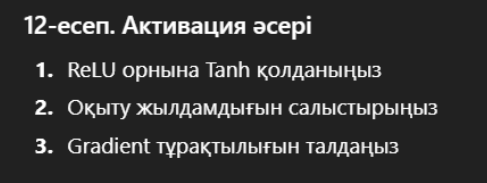

Epoch 0, Error (Loss): 0.6931752618726559
Epoch 500, Error (Loss): 0.6931233714709655
Epoch 1000, Error (Loss): 0.6931632405869983
Epoch 1500, Error (Loss): 0.6931416588992274
Epoch 2000, Error (Loss): 0.5315839928917824
Epoch 2500, Error (Loss): 0.47911110318704414
Epoch 3000, Error (Loss): 0.4783451233132704
Epoch 3500, Error (Loss): 0.47804280955198186
Epoch 4000, Error (Loss): 0.47788276581435407
Epoch 4500, Error (Loss): 0.4777840552738628


Entrance: [0 0] -> Prediction: 0.0013 -> Class: 0
Entrance: [0 1] -> Prediction: 0.6668 -> Class: 1
Entrance: [1 0] -> Prediction: 0.6664 -> Class: 1
Entrance: [1 1] -> Prediction: 0.6666 -> Class: 1


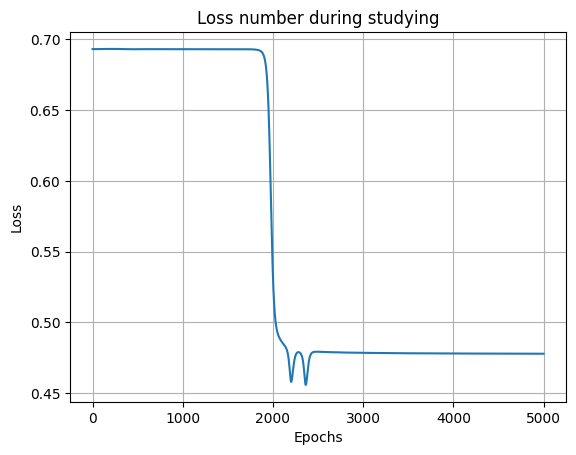

In [ ]:

mlp_tanh = MLP(input_l=2, hidden_l=4, output_l=1, lr=0.1, activation='tanh')
mlp_tanh.fit(X_train, y_train, epochs=5_000)

print("\n")

mlp_preds = mlp_tanh.forward(X_train)

for i in range(len(X_train)):
    prediction_value = mlp_preds[i][0]
    predicted_class = int(prediction_value > 0.5)
    
    print(f"Entrance: {X_train[i]} -> Prediction: {prediction_value:.4f} -> Class: {predicted_class}")

# Plotting 
plt.plot(mlp_tanh.loss_history)
plt.title("Loss number during studying")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

### Task 13 
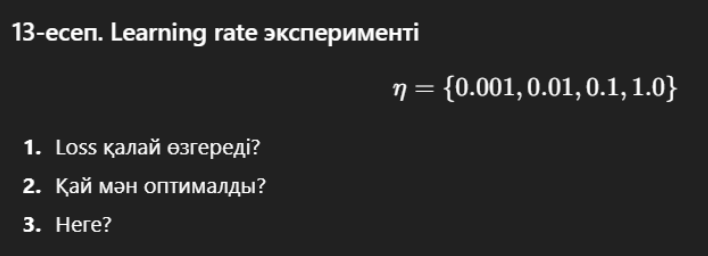

Epoch 0, Error (Loss): 0.6931346727498973
Epoch 500, Error (Loss): 0.6931346727498973
Epoch 1000, Error (Loss): 0.6931346727498973
Epoch 1500, Error (Loss): 0.6931346727498973
Epoch 2000, Error (Loss): 0.6931346727498973
Epoch 2500, Error (Loss): 0.6931346727498973
Epoch 3000, Error (Loss): 0.6931346727498973
Epoch 3500, Error (Loss): 0.6931346727498973
Epoch 4000, Error (Loss): 0.6931346727498973
Epoch 4500, Error (Loss): 0.6931346727498973


Entrance: [0 0] -> Prediction: 0.5000 -> Class: 0
Entrance: [0 1] -> Prediction: 0.5015 -> Class: 1
Entrance: [1 0] -> Prediction: 0.4967 -> Class: 0
Entrance: [1 1] -> Prediction: 0.4981 -> Class: 0


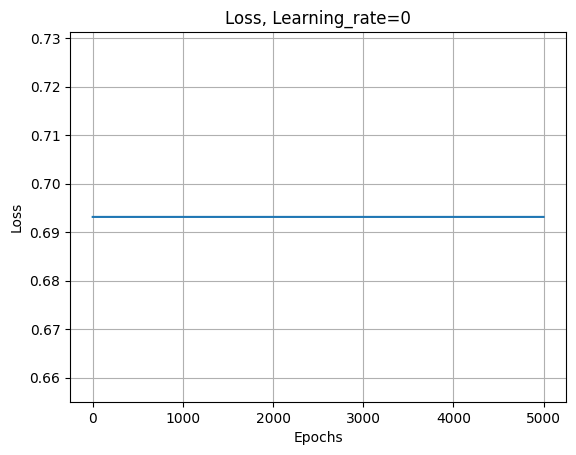

Epoch 0, Error (Loss): 0.6933495995045614
Epoch 500, Error (Loss): 0.4775841140951308
Epoch 1000, Error (Loss): 0.4774786062773588
Epoch 1500, Error (Loss): 0.47744606088766717
Epoch 2000, Error (Loss): 0.4774303686480278
Epoch 2500, Error (Loss): 0.47742115717341393
Epoch 3000, Error (Loss): 0.47741510591108804
Epoch 3500, Error (Loss): 0.4774108289130301
Epoch 4000, Error (Loss): 0.4774076463359644
Epoch 4500, Error (Loss): 0.47740518597418447


Entrance: [0 0] -> Prediction: 0.0001 -> Class: 0
Entrance: [0 1] -> Prediction: 0.6664 -> Class: 1
Entrance: [1 0] -> Prediction: 0.6664 -> Class: 1
Entrance: [1 1] -> Prediction: 0.6664 -> Class: 1


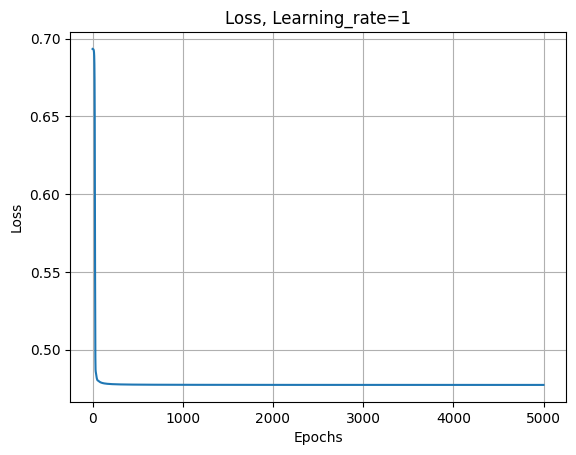

Epoch 0, Error (Loss): 0.693209036265402
Epoch 500, Error (Loss): 1.9365056200882393
Epoch 1000, Error (Loss): 1.937922116571626
Epoch 1500, Error (Loss): 0.0005353579942245596
Epoch 2000, Error (Loss): 0.00025848584123186854
Epoch 2500, Error (Loss): 0.00017037939767158302
Epoch 3000, Error (Loss): 0.00012707671388884049
Epoch 3500, Error (Loss): 0.00010174172830062985
Epoch 4000, Error (Loss): 0.00010545009717928732
Epoch 4500, Error (Loss): 0.00011201967303501653


Entrance: [0 0] -> Prediction: 0.0000 -> Class: 0
Entrance: [0 1] -> Prediction: 0.9999 -> Class: 1
Entrance: [1 0] -> Prediction: 0.9999 -> Class: 1
Entrance: [1 1] -> Prediction: 0.0000 -> Class: 0


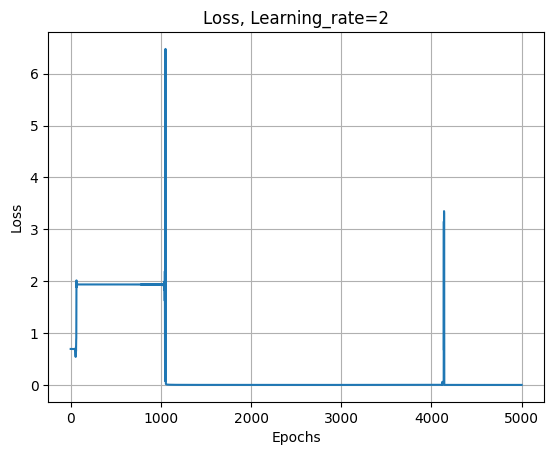

Epoch 0, Error (Loss): 0.6933727217688266
Epoch 500, Error (Loss): 4.748712021125774
Epoch 1000, Error (Loss): 5.068539395576498
Epoch 1500, Error (Loss): 5.258239379033375
Epoch 2000, Error (Loss): 5.391388378125667
Epoch 2500, Error (Loss): 5.492306282393314
Epoch 3000, Error (Loss): 5.5721473452382675
Epoch 3500, Error (Loss): 5.6370087977389245
Epoch 4000, Error (Loss): 5.690623301983628
Epoch 4500, Error (Loss): 5.735467313783356


Entrance: [0 0] -> Prediction: 0.0000 -> Class: 0
Entrance: [0 1] -> Prediction: 0.0000 -> Class: 0
Entrance: [1 0] -> Prediction: 0.0000 -> Class: 0
Entrance: [1 1] -> Prediction: 0.0000 -> Class: 0


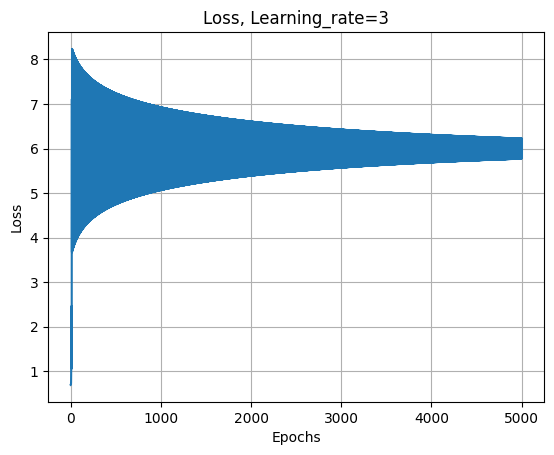

In [ ]:
lr_n = [0.001, 0.01, 0.1, 1.0]

for lr_i in range(len(lr_n)):

    mlp_tanh = MLP(input_l=2, hidden_l=4, output_l=1, lr=lr_i, activation='tanh')
    mlp_tanh.fit(X_train, y_train, epochs=5_000)

    print("\n")

    mlp_preds = mlp_tanh.forward(X_train)

    for i in range(len(X_train)):
        prediction_value = mlp_preds[i][0]
        predicted_class = int(prediction_value > 0.5)
        
        print(f"Entrance: {X_train[i]} -> Prediction: {prediction_value:.4f} -> Class: {predicted_class}")

    # Plotting 
    plt.plot(mlp_tanh.loss_history)
    plt.title(f"Loss, Learning_rate={lr_i}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

# IV. Research and Thinking 

### Task 14 
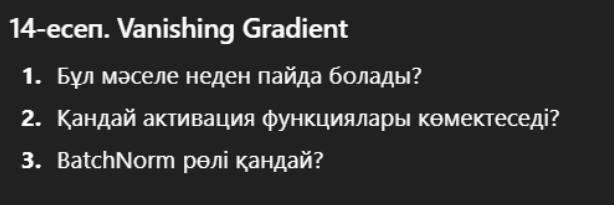

### Task 15
 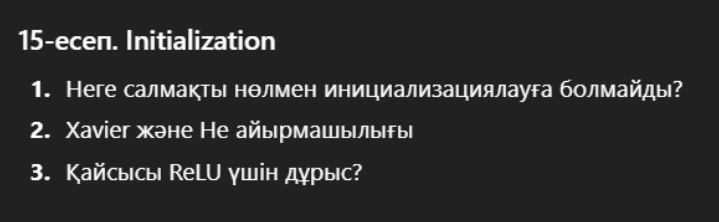

### Task 16
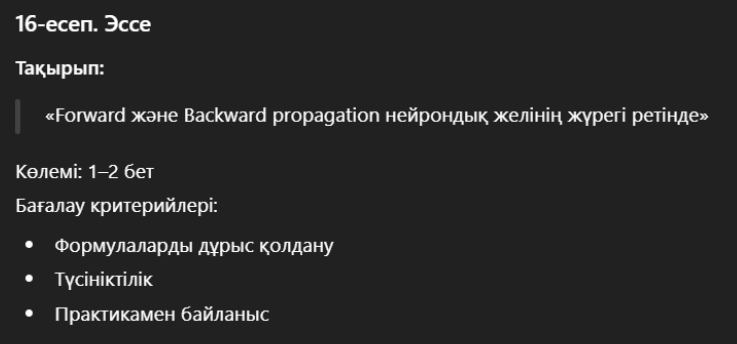